# H2 GWP - Links to Plots and Tables 
  * [Compression of H2](#H2-Compression)
  * [Liquid Transport tables](#Liquid-Transport)
  * [Gas Transport tables](#Gas-Transport)
  * [Transport Plots](#Transport-Plot)
  * [Pathway Impact tables](#Pathway-Impact)
  * [Pathway Plot](#Pathway-Plot)
  
  (the TOC links do not function on github, sorry!)

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from importlib import reload
import utils
from IPython.display import display, Markdown, Latex
reload(utils)

workbook = "../Paper_tables.xlsx"
bartype = 'barh'
sns.set()

# H2 Compression Plot

In [31]:
# Get compression work data
df = utils.data_frame_from_xlsx(workbook,"work",True)
df = df.apply(pd.to_numeric)
df.columns = ['t','p','h','s','wc'];
df.index = range(len(df)) # Dropping doesn't reindex
df['wc'] = df.wc.astype('float64')

In [32]:
def pltwc(ax):
    sns.scatterplot(ax=ax,x='p',y='wc',data=df
                   , marker='x', color='r')
    sns.lineplot(ax=ax,x='p',y='wc',data=df
                   , color='b')

    t=ax.set_xlabel("P(MPa)")
    t=ax.set_ylabel(r'$W_c(kWh)$')
    leg = ax.legend([r'$4.63P^{.06249}-4.581$ [curve fit]'
                     ,r'$T(S_1-S_2)-(H_1-H_2)$ [NIST]'])
    
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)    
    
    return ax

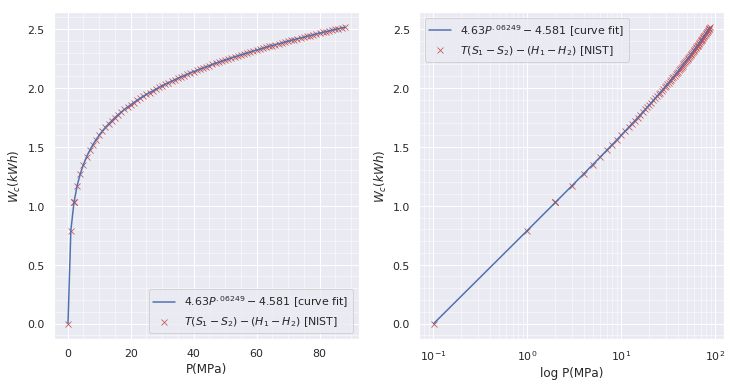

In [33]:
# Add curve-fit
df['curve'] = 4.63*df.p**0.06249 - 4.581

# Create plots
f, axes = plt.subplots(1, 2,figsize=(12, 6))  
pltwc(axes[0])
pltwc(axes[1])
axes[1].set_xscale('log')
t=axes[1].set_xlabel("log P(MPa)")
f.savefig('img_compression.png')

## Liquid Transport
This imports all data for plotting liquid transport GWP, and prepares it for plotting.

In [34]:
# Liquid
lq = utils.data_frame_from_xlsx(workbook,"liq_transport",header_row=True,index_col='Destination').iloc[0:-1]
lincr = utils.data_frame_from_xlsx(workbook,"liq_incr",header_row=True,index_col='Destination').iloc[0:-1]
ldecr = utils.data_frame_from_xlsx(workbook,"liq_decr",header_row=True,index_col='Destination').iloc[0:-1]

# Make labels
def makelabel(row):
    return "%s\n%.3g km\n%.1f h" % tuple(row[['Destination','Dist','Time']])
lq['labels'] = lq.apply(makelabel,axis=1)
lq.drop('Destination',inplace=True,axis=1)
lq.rename({'labels':'Destination'},inplace=True,axis=1)

plotcols = ['Prep', 'Loss1', 'Transport', 'Boiloff','Loss2']

display(Markdown('### Liquid GWP Tables'))
display(lq.drop(['Destination'],axis=1))
display(Markdown('### Potential **increase** in GWP'))
display(lincr.drop(['Destination','Dist','Time'],axis=1))
display(Markdown('### Potential **decrease** in GWP'))
display(ldecr.drop(['Destination','Dist','Time'],axis=1))

### Liquid GWP Tables

,Dist,Time,Prep,Loss1,Transport,Boiloff,Loss2,Total
Destination,,,,,,,,
Surrey,24.8459,0.8,0.1206,0.090618,0.00540072,0.00015,0.0888112,0.30558
Vancouver,20.2793,0.6,0.1206,0.090618,0.00440807,0.0001125,0.0888107,0.304549
UBC,20.0856,0.6,0.1206,0.090618,0.00436597,0.0001125,0.0888107,0.304507
CRD,125,3.5,0.1206,0.090618,0.027171,0.00065625,0.0888188,0.327864


### Potential **increase** in GWP

,Prep,Loss1,Transport,Boiloff,Loss2,Total
Destination,,,,,,
Surrey,0.00603,0.0598079,0,4.95e-05,0.0586154,0.124503
Vancouver,0.00603,0.0598079,0,3.7125e-05,0.0586151,0.12449
UBC,0.00603,0.0598079,0,3.7125e-05,0.0586151,0.12449
CRD,0.00603,0.0598079,0,0.000216562,0.0586204,0.124675


### Potential **decrease** in GWP

,Prep,Loss1,Transport,Boiloff,Loss2,Total
Destination,,,,,,
Surrey,0.01809,0.0598079,0.000540072,4.95e-05,0.0586154,0.137103
Vancouver,0.01809,0.0598079,0.000440807,3.7125e-05,0.0586151,0.136991
UBC,0.01809,0.0598079,0.000436597,3.7125e-05,0.0586151,0.136987
CRD,0.01809,0.0598079,0.0027171,0.000216562,0.0586204,0.139452


In [35]:
# Pandas magic to build arcane error array, format [# groups] x [pos + neg = 2] x [# bars per group]
# from https://stackoverflow.com/questions/35978727/how-add-asymmetric-errorbars-to-pandas-grouped-barplot
ler = []
for col in plotcols:  # Iterate over bar groups (represented as columns)
    ler.append([ldecr[col].values, lincr[col].values])
    
# Create liquid **total** error array
lter = [ ldecr['Total'].values, lincr['Total'].values]

# Gas Transport

In [36]:
# Gas values and error data 
gt = utils.data_frame_from_xlsx(workbook,"gas_transp",header_row=True,index_col='Destination').iloc[0:-1]
gincr = utils.data_frame_from_xlsx(workbook,"gas_incr",header_row=True,index_col='Destination').iloc[0:-1]
gdecr = utils.data_frame_from_xlsx(workbook,"gas_decr",header_row=True,index_col='Destination').iloc[0:-1]

# Make labels
def makelabelg(row):
    return "%s\n%.3g km" % tuple(row[['Destination','Dist']])

gt['labels'] = gt.apply(makelabelg,axis=1)
gt.drop('Destination',inplace=True,axis=1)
gt.rename({'labels':'Destination'},inplace=True,axis=1)

gplotcols = ['Prep', 'Transport' ] # Loss1/2 are zero for now

display(Markdown('## Liquid GWP Tables'))
display(gt[gplotcols+['Total']])
display(Markdown('### Potential **increase** in GWP'))
display(gincr.drop(['Destination','Dist'],axis=1))
display(Markdown('### Potential **decrease** in GWP'))
display(gdecr.drop(['Destination','Dist'],axis=1))

## Liquid GWP Tables

,Prep,Transport,Total
Destination,,,
Surrey,0.0260245,0.0297732,0.0557977
Vancouver,0.0260245,0.0243009,0.0503254
UBC,0.0260245,0.0240688,0.0500933
CRD,0.0260245,0.149789,0.175814


### Potential **increase** in GWP

,Prep,Transport,Total
Destination,,,
Surrey,0.00719826,0,0.00719826
Vancouver,0.00719826,0,0.00719826
UBC,0.00719826,0,0.00719826
CRD,0.00719826,0,0.00719826


### Potential **decrease** in GWP

,Prep,Transport,Total
Destination,,,
Surrey,0.00719826,0.00297732,0.0101756
Vancouver,0.00719826,0.00243009,0.00962835
UBC,0.00719826,0.00240688,0.00960514
CRD,0.00719826,0.0149789,0.0221772


### Transport Plot setup

In [37]:
# Pandas magic to build arcane error array, format [# groups] x [pos + neg = 2] x [# bars per group]
# from https://stackoverflow.com/questions/35978727/how-add-asymmetric-errorbars-to-pandas-grouped-barplot
ger = []
for col in gplotcols:  # Iterate over bar groups (represented as columns)
    ger.append([gdecr[col].values, gincr[col].values])
    
# Create liquid **total** error array
gter = [ gdecr['Total'].values, gincr['Total'].values]

In [38]:
def transplot():
    fig, axes = plt.subplots(2,2
         ,figsize=(10, 8)
         ,sharex='col'
         ,sharey='row')
    plt.tight_layout()
    gwplabel = r'GWP ($kg\, CO_2e/kg\, H_2)$'


    # Liquid components
    ax = axes[0,0] # top left
    lq.plot(kind=bartype
        ,y=plotcols
        #,logx=True
        ,xerr=ler,capsize=2
        ,x='Destination'#,rot=0
        ,ax=ax
       )
    ax.invert_yaxis() # barh puts everything upside down by default
    leg = ax.legend(title='Liquid',bbox_to_anchor=(-.35,.5), loc="center right")
    ax.set_ylabel('Liquid Transport')
    ax.set_xscale('symlog',linthreshx=.0001)

    # Liquid totals
    ax = axes[0,1] # top right
    ax = lq.plot(kind=bartype
        #,logy=True
        ,xerr=lter,capsize=2
        ,x='Destination'#,rot=0
        ,y='Total'
        ,ax=ax
        ,color='b'
       )
    ax.invert_yaxis()
    ax.get_legend().remove()
    #ax.set_ylabel('')

    # Gas components
    ax = axes[1,0]
    #ax.set_xscale('symlog',linthreshx=.3); label = 'log ' + label
    gt.plot(kind=bartype
        ,y=gplotcols
        ,ax=ax
        ,x='Destination'
        ,xerr=ger,capsize=2
        )
    #leg = ax.legend(title='Gas')
    leg = ax.legend(title='Gas',bbox_to_anchor=(-.35,.5), loc="center right")
    ax.set_xlabel('Log ' + gwplabel)
    ax.set_ylabel('Gas Transport')
    ax.invert_yaxis() # barh puts everything upside down by default
    ax.set_xscale('symlog',linthreshx=.0001)

    # Gas totals
    ax = axes[1,1]
    ax = gt.plot(kind=bartype
        #,logy=True
        ,xerr=gter,capsize=2
        ,x='Destination'#,rot=0
        ,y='Total'
        ,ax=ax
        ,color='b'
       )
    ax.invert_yaxis()
    #ax.set_ylabel('')
    ax.get_legend().remove()
    ax.set_xlabel('Total ' + gwplabel)

    fig.savefig('img_transport.png',bbox_inches='tight')

# Transport Plot

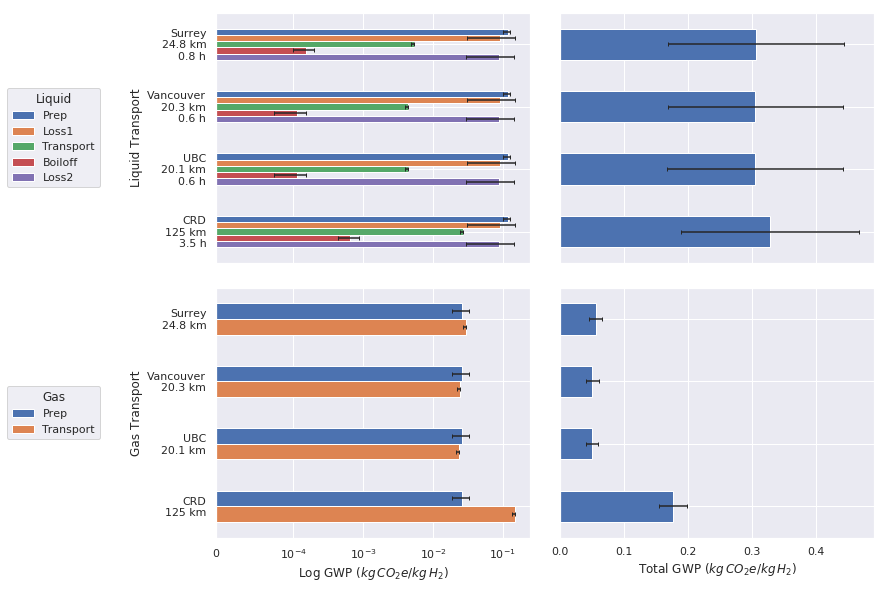

In [39]:
transplot()

# Pathway Impact

In [40]:
# Retrieve pathways from spreadsheet
xl = utils.data_frame_from_xlsx(workbook,"pathways",header_row=True,index_col='Pathway')
# consolidate into produce, transport, dispense

def consolidate(xl):
    trancols = ['Compress','Loss1','Transport','Boiloff','Loss2']
    path = pd.DataFrame()
    path['Produce'] = xl['Produce']
    path['Transport'] = xl[trancols].sum(axis=1)
    dispcols = ['Store','Stepup','Loss3']
    path['Dispense']= xl[dispcols].sum(axis=1)
    return path

path = consolidate(xl)

display(Markdown('### All GWP components'))
display(xl)
display(Markdown('### Consolidated GWP components'))
display(path)

# Pathway error consolidated totals
xlppe = utils.data_frame_from_xlsx(workbook,"path_incr",header_row=True,index_col='Pathway')
ppe = consolidate(xlppe)
display(Markdown('### Consolidated GWP max error (+)'))
display(ppe)

xlpne = utils.data_frame_from_xlsx(workbook,"path_decr",header_row=True,index_col='Pathway')
pne = consolidate(xlpne)
display(Markdown('### Consolidated GWP max error (-)'))
display(pne)

### All GWP components

,Pathway,Produce,Compress,Loss1,Transport,Boiloff,Loss2,Store,Stepup,Loss3,None,Total
Pathway,,,,,,,,,,,,
WE-L,WE-L,48.6,0.1206,0.817809,0.0104337,0.0140277,0.81621,0.00105118,0,0.272,None,50.6521
SM-G,SM-G,12.1051,0.0022305,0,4.72375,0,0,0,0.011004,0.0895807,None,16.9317
SM-L,SM-L,12.1051,0.108,0.270197,0.856866,0.00483708,0.26865,0.00105118,0.011004,0.0895807,None,13.7153
LE-L,LE-L,0.54,0.1206,0.096909,0.0104337,0.00163722,0.0951246,0.00105118,0,0.0317,None,0.897456
LE-G,LE-G,0.54,0.0022305,0,0.057519,0,0,0,0.011004,0.031755,None,0.642508
DIS-G,DIS-G,0.243,0.0260245,0,0.057519,0,0,0,0.011004,0.03027,None,0.367817
BE-G,BE-G,0.168,0.0260245,0,0.057519,0,0,0,0.011004,0.029895,None,0.292442
DIV-G,DIV-G,-5.8,0.0260245,0,0.057519,0,0,0,0.011004,5.50198e-05,None,-5.7054


### Consolidated GWP components

,Produce,Transport,Dispense
Pathway,,,
WE-L,48.6,1.779081,0.273051
SM-G,12.1051,4.725980,0.100585
SM-L,12.1051,1.508550,0.101636
LE-L,0.54,0.324704,0.032751
LE-G,0.54,0.059750,0.042759
DIS-G,0.243,0.083543,0.041274
BE-G,0.168,0.083543,0.040899
DIV-G,-5.8,0.083543,0.011059


### Consolidated GWP max error (+)

,Produce,Transport,Dispense
Pathway,,,
WE-L,0,0.552613,0.002983
SM-G,0.605256,0.000617,0.004142
SM-L,0.605256,0.293203,0.004404
LE-L,0.054,0.073192,0.000580
LE-G,0.054,0.000617,0.003563
DIS-G,0.04374,0.007198,0.003548
BE-G,0,0.007198,0.003545
DIV-G,0.58,0.007198,0.003246


### Consolidated GWP max error (-)

,Produce,Transport,Dispense
Pathway,,,
WE-L,0,0.572226,0.002983
SM-G,0.605256,0.472992,0.004142
SM-L,0.605256,0.391616,0.004404
LE-L,0.054,0.087067,0.000580
LE-G,0.054,0.006369,0.003563
DIS-G,0.0486,0.012950,0.003548
BE-G,0,0.012950,0.003545
DIV-G,0,0.012950,0.003246


## Projection table

In [107]:
reload(utils)
prj = utils.data_frame_from_xlsx(workbook,"proj_table"
         ,header_row=True
         ,shorten_names=False
         ,index_col='Source'
        ).iloc[0:-1,:]
prj.columns = ['Source','Production','H2 Equiv','H2 Impact','Fossil Displaced'
               ,'Fossil Impact','Net Impact']
#prj['f'] = -1* prj['Fossil Displaced']
prj['Fossil Impact'] = -prj['Fossil Impact']
prj['Net Impact'] = -prj['Net Impact']
prj

,Source,Production,H2 Equiv,H2 Impact,Fossil Displaced,Fossil Impact,Net Impact
Source,,,,,,,
LE-G,LE-G,810.3,0.642508,520.625,6779.65,14915.2,14914.6
Displace,Displace,9672.5,0.367817,3557.71,80928.3,178042,178042
Divert,Divert,3102.5,-5.7054,-17701,25958.1,57107.9,57113.6


### Projection chart
This is a placeholder for a TBD figure showing the projection.

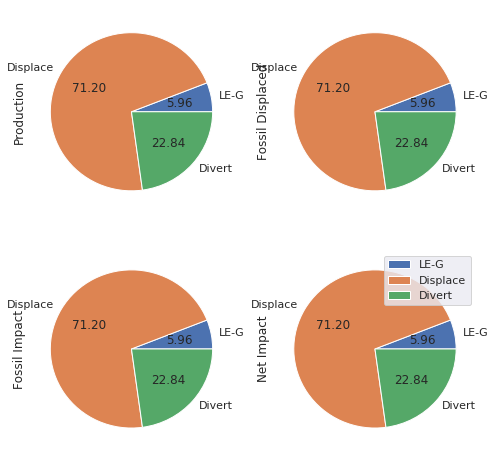

In [106]:
fig, axes = plt.subplots(2,2
     ,figsize=(8, 8)
    )
cols = ['Production','Fossil Displaced','Fossil Impact','Net Impact']
for i, a in enumerate(axes.flatten()):
    p = prj.plot.pie(cols[i],ax=a,autopct='%.2f')

    if i==3: break
    a.get_legend().remove()

In [88]:
np.shape()

(4,)

### Pathway Plot setup

In [41]:
# Pandas magic to build arcane error array, format [# groups] x [pos + neg = 2] x [# bars per group]
# from https://stackoverflow.com/questions/35978727/how-add-asymmetric-errorbars-to-pandas-grouped-barplot
pplotcols = ['Produce', 'Transport', 'Dispense']
per = []
for col in pplotcols:  # Iterate over bar groups (represented as columns)
    per.append([pne[col].values, ppe[col].values])
    
# Create liquid **total** error array
pter = [ pne[pplotcols].sum(axis=1).values, ppe[pplotcols].sum(axis=1).values]
#display(per)
#display(pter)

In [42]:
def pathplot():
    fig, axes = plt.subplots(1,2
         ,figsize=(12, 6)
         ,sharex='col'
         ,sharey='row')
    plt.tight_layout()
    gwplabel = r'GWP ($kg\, CO_2e/kg\, H_2)$'


    # Plot pathway components
    ax = axes[0]
    label = r'GWP ($kg\, CO_2e/kg\, H_2)$'
    ax.set_xscale('symlog',linthreshx=.3); label = 'log ' + label
    ax.set_xlabel(label)
    ax = path.plot(kind='barh'
        #,stacked=True
        ,xerr=per,capsize=2
        ,ax=ax)
    #leg = ax.legend(title='',bbox_to_anchor=(-.18,.5), loc="center right")
    leg = ax.legend(title='')
    ax.invert_yaxis()

    # Plot pathway totals
    ax = axes[1]
    ax = xl.plot(kind=bartype
        #,logy=True
        ,xerr=pter,capsize=2
        ,x='Pathway'#,rot=0
        ,y='Total'
        ,ax=ax
        ,color='b'
        #,color='None',hatch='/',edgecolor='b'
       )
    ax.invert_yaxis()
    #ax.set_ylabel('')
    ax.get_legend().remove()
    ax.set_xlabel('Total ' + gwplabel)

    #total = df.sum(axis=1)
    for i,v in enumerate(xl.Total):
        txt = "%.3g" % v
        txtx = 1.5
        #if(v<0): txtx=-.4
        ax.text(txtx ,i+.1,txt)

    fig.savefig('img_pathways.png',bbox_inches='tight')

# Pathway Plot
<a id="pathplotanchor"></a>

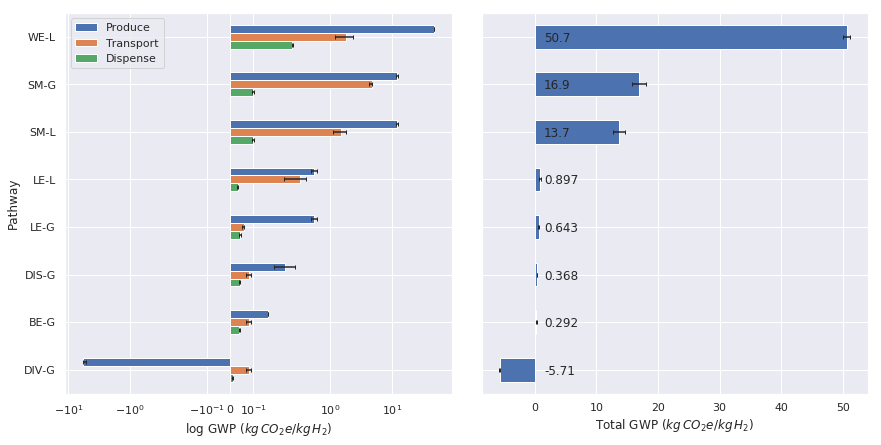

In [44]:
pathplot()